In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

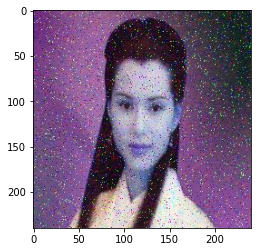

In [ ]:
img0 = cv2.imread('/content/drive/MyDrive/XuLyAnh/CoCo3.jpg')
plt.imshow(img0)
plt.show()

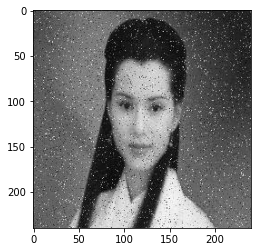

In [ ]:
img = cv2.imread('/content/drive/MyDrive/XuLyAnh/CoCo3.jpg',0)
plt.imshow(img,cmap="gray")
plt.show()

In [ ]:
img1 = copy.copy(img)


**TICH CHAP**

In [ ]:
def TichChap1(img,kernel): #cai nay chi xay dung cho bo loc 3*3
  m,n= img.shape

  zero = np.zeros((m+2,n+2))
  zero[1:(m+1),1:(n+1)]= img
  zero1= copy.copy(zero)
  for i in np.arange(1,m+1):
    for j in np.arange(1,n+1):
      zero[i,j]= np.sum(zero1[i-1:i+2,j-1:j+2]* kernel)

  return zero[1:m+1,1:n+1]

In [ ]:
I = np.array([
              [1,2,4,5,8,7],
              [2,1,1,4,2,2],
              [4,5,5,8,8,2],
              [1,2,1,1,4,4],
              [7,2,2,1,5,2]
])

matna = np.array([
                  [0,1,0],
                  [1,1,1],
                  [0,1,0]
])

I1 = copy.copy(I)


In [ ]:
I1 = TichChap1(I1,matna)

print("I ban dau:")
print(I)
print("I sau khi tich chap:")
print(I1)


I ban dau:
[[1 2 4 5 8 7]
 [2 1 1 4 2 2]
 [4 5 5 8 8 2]
 [1 2 1 1 4 4]
 [7 2 2 1 5 2]]
I sau khi tich chap:
[[ 5.  8. 12. 21. 22. 17.]
 [ 8. 11. 15. 20. 24. 13.]
 [12. 17. 20. 26. 24. 16.]
 [14. 11. 11. 15. 22. 12.]
 [10. 13.  6.  9. 12. 11.]]


**LOC TRUNG VI**

Dau tien chung ta viet mot function cho tim nguong tu dong
cong thuc la min(max(cot))

In [ ]:
def TimNguong(image):
  vector=[]
  for i in np.arange(0,image.shape[1]):
    ok= np.max(image[:,i])
    vector.append(ok)
  return np.min(vector)

In [ ]:
def LocTrungVi(image,thetha): #cai nay chi phu hop voi bo loc 3*3 
  m,n = image.shape
  image1= copy.copy(image)
  for i in np.arange(1,m-1):
    for j in np.arange(1,n-1):
      median = np.median(image1[i-1:i+2,j-1:j+2])
      if np.absolute(image1[i,j]-median)> thetha:
        image[i,j]=median

  return image


In [ ]:
def LocTrungVi1(image):
  m,n = image.shape
  thetha = TimNguong(image)
  image1= copy.copy(image)
  for i in np.arange(1,m-1):
    for j in np.arange(1,n-1):
      median = np.median(image1[i-1:i+2,j-1:j+2])
      if np.absolute(image1[i,j]-median)> thetha:
        image[i,j]=median

  return image

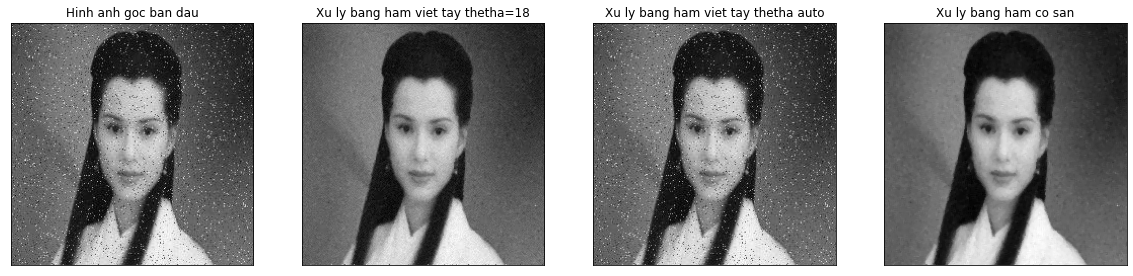

In [ ]:
thetha = 18
imageH= copy.copy(img1)
imageT= copy.copy(img1)
imageTT= copy.copy(img1)
imageT= LocTrungVi(imageT,thetha)
imageTT = LocTrungVi1(imageTT)
imageH = cv2.medianBlur(imageH,3) # lan luot la anh, kich thuoc kernel

plt.figure(figsize=(20,6))
plt.subplot(141) , plt.imshow(img1,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(142) , plt.imshow(imageT,cmap="gray"), plt.title("Xu ly bang ham viet tay thetha=18")
plt.xticks([]), plt.yticks([])
plt.subplot(143) , plt.imshow(imageTT,cmap="gray"), plt.title("Xu ly bang ham viet tay thetha auto")
plt.xticks([]), plt.yticks([])
plt.subplot(144) , plt.imshow(imageH,cmap="gray"), plt.title("Xu ly bang ham co san")
plt.xticks([]), plt.yticks([])
plt.show()

**LOC TRUNG BINH**

In [ ]:
def LocTrungBinh(image,thetha): #cai nay chi phu hop voi bo loc 3*3
  m,n = image.shape
  image1= copy.copy(image)
  for i in np.arange(1,m-1):
    for j in np.arange(1,n-1):
      mean = round(np.mean(image1[i-1:i+2,j-1:j+2]))
      if np.absolute(image1[i,j]-mean)> thetha:
        image[i,j]=mean

  return image

In [ ]:
def LocTrungBinh1(image):
  m,n = image.shape
  thetha= TimNguong(image)
  image1= copy.copy(image)
  for i in np.arange(1,m-1):
    for j in np.arange(1,n-1):
      mean = round(np.mean(image1[i-1:i+2,j-1:j+2]))
      if np.absolute(image1[i,j]-mean)> thetha:
        image[i,j]=mean

  return image

In [ ]:
I11= np.array([
               [1,2,3,2],
               [4,16,2,1],
               [4,2,1,1],
               [2,1,2,1]
])

I12= copy.copy(I11)

In [ ]:
I12= LocTrungBinh(I12,2)
print("I sau khi su dung loc trung binh: ")
print(I12)

I sau khi su dung loc trung binh: 
[[1 2 3 2]
 [4 4 2 1]
 [4 2 1 1]
 [2 1 2 1]]


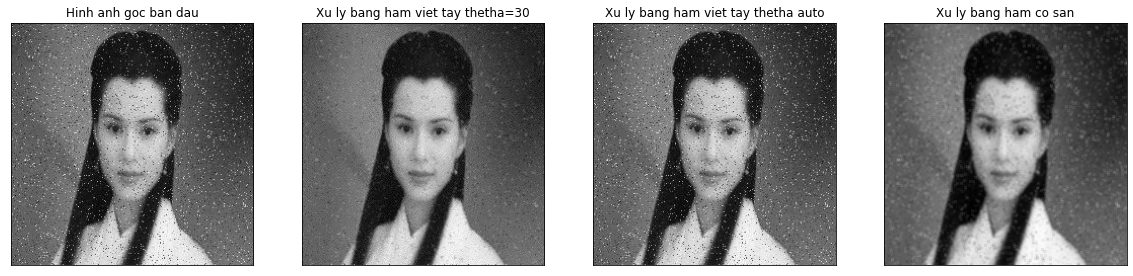

In [ ]:
thetha = 30 # min(max(cot))
imageH1= copy.copy(img1)
imageT1= copy.copy(img1)
imageTT1 = copy.copy(img1)
imageTT1 = LocTrungBinh1(imageTT1)
imageT1= LocTrungBinh(imageT1,thetha)
imageH1 = cv2.blur(imageH1,(3,3)) # lan luot la anh, kich thuoc kernel

plt.figure(figsize=(20,6))
plt.subplot(141) , plt.imshow(img1,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(142) , plt.imshow(imageT1,cmap="gray"), plt.title("Xu ly bang ham viet tay thetha=30")
plt.xticks([]), plt.yticks([])
plt.subplot(143) , plt.imshow(imageTT1,cmap="gray"), plt.title("Xu ly bang ham viet tay thetha auto")
plt.xticks([]), plt.yticks([])
plt.subplot(144) , plt.imshow(imageH1,cmap="gray"), plt.title("Xu ly bang ham co san")
plt.xticks([]), plt.yticks([])
plt.show()

**GIA TRUNG VI**

In [ ]:
def TimM(matrix):
  vector1=[] # luu gia tri min cua tung hang
  vector2=[] # luu gia tri max cua tung hang
  for i in np.arange(0,matrix.shape[0]):
    ok = min(matrix[i,:])
    ok1 = max(matrix[i,:])
    vector1.append(ok)
    vector2.append(ok1)
  
  return round((np.max(vector1)+np.min(vector2))/2)

In [ ]:
def GiaTrungVi(image):
  m,n = image.shape
  thetha = TimNguong(image)
  image1=copy.copy(image)
  for i in np.arange(1,m-1):
    for j in np.arange(1,n-1):
      median = TimM(np.array([
                          [image1[i-1,j-1],image1[i-1,j],image1[i-1,j+1]],
                          [image1[i,j-1],image1[i,j],image1[i,j+1]],
                          [image1[i+1,j-1],image1[i+1,j],image1[i+1,j+1]]
                         ]))
      if np.absolute(image1[i,j]-median)> thetha:
        image[i,j]=median

  return image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


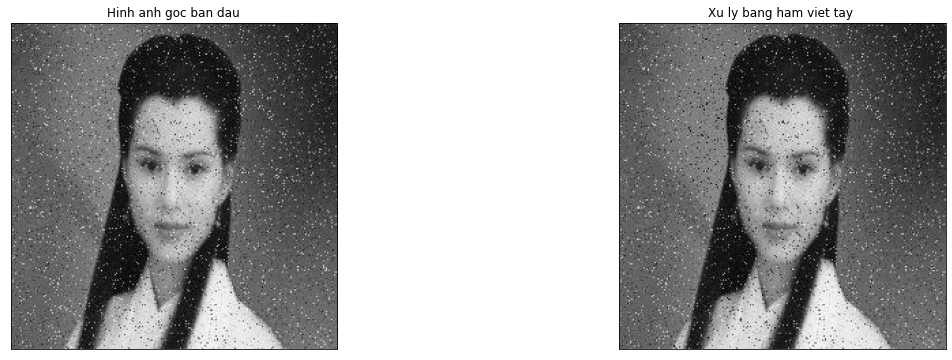

In [ ]:
imageT2 = copy.copy(img1)
imageT2 = GiaTrungVi(imageT2)

plt.figure(figsize=(20,6))
plt.subplot(121) , plt.imshow(img1,cmap='gray'), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(imageT2,cmap='gray'), plt.title("Xu ly bang ham viet tay ")
plt.xticks([]), plt.yticks([])
plt.show()

**Lọc trung vị với kích thước size kernel tự xét, và với các bộ lọc khác nhau**

*chú ý kernel chỉ phù hợp với kích thước lẻ, nếu kích thước chẵn k thực hiện đc*

In [ ]:
def LocTrungBinh2(image,thetha,size=3,const=9):
  m,n = image.shape
  heso= int(size/2)
  image1= copy.copy(image)
  for i in np.arange(heso,m-heso):
    for j in np.arange(heso,n-heso):
      #mean = round(np.mean([image[i,j],image[i+1,j],image[i-1,j],image[i,j+1],image[i,j-1],image[i+1,j+1],image[i-1,j+1],image[i+1,j-1],image[i-1,j-1]]))
      sum= np.sum(image1[(i-heso):(i+heso+1),(j-heso):(j+heso+1)])
      mean = round(sum/const)
      if np.absolute(image1[i,j]-mean)> thetha:
        image[i,j]=mean

  return image

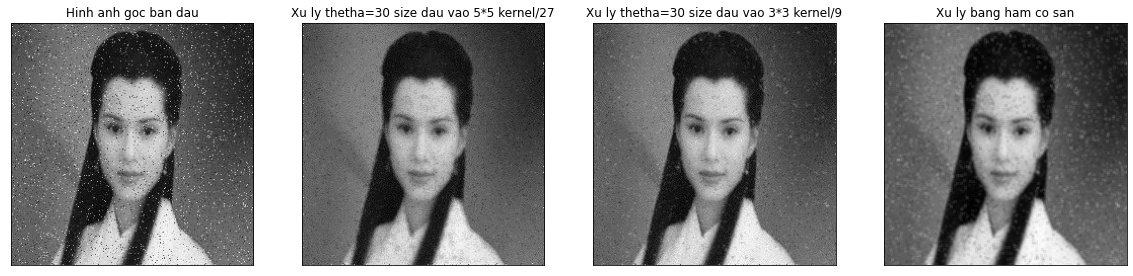

In [ ]:
thetha3 = 30 
thethaauto = TimNguong(img1)
imageH4= copy.copy(img1)
imageT4= copy.copy(img1)
imageTT4 = copy.copy(img1)
imageTT4 = LocTrungBinh2(imageTT4,thetha3)
imageT4= LocTrungBinh2(imageT4,thetha3,5,27)
imageH4 = cv2.medianBlur(imageH4,(3,3)) # lan luot la anh, kich thuoc kernel

plt.figure(figsize=(20,6))
plt.subplot(141) , plt.imshow(img1,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(142) , plt.imshow(imageT4,cmap="gray"), plt.title("Xu ly thetha=30 size dau vao 5*5 kernel/27")
plt.xticks([]), plt.yticks([])
plt.subplot(143) , plt.imshow(imageTT4,cmap="gray"), plt.title("Xu ly thetha=30 size dau vao 3*3 kernel/9")
plt.xticks([]), plt.yticks([])
plt.subplot(144) , plt.imshow(imageH1,cmap="gray"), plt.title("Xu ly bang ham co san")
plt.xticks([]), plt.yticks([])
plt.show()

**Lọc trung vị với kích thước size kernel tự xét**

*chú ý kernel chỉ phù hợp với kích thước lẻ, nếu kích thước chẵn k thực hiện đc*

In [ ]:
def LocTrungVi2(image,thetha,size=3):
  m,n = image.shape
  heso= int(size/2)
  image1= copy.copy(image)
  for i in np.arange(heso,m-heso):
    for j in np.arange(heso,n-heso):
      median = np.median(image1[i-heso:i+heso+1,j-heso:j+1+heso])
      if np.absolute(image1[i,j]-median)> thetha:
        image[i,j]=median

  return image

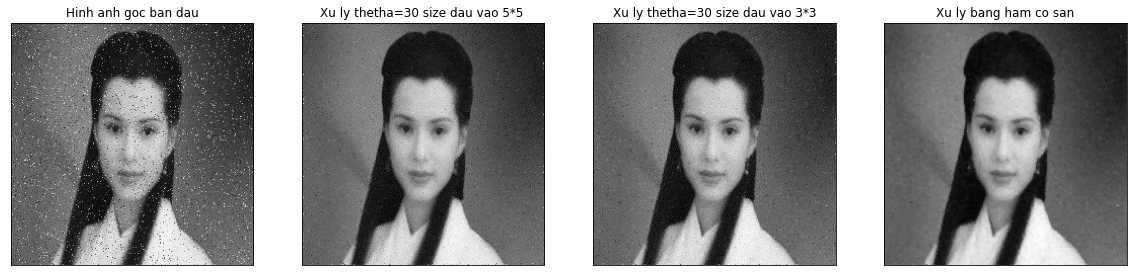

In [ ]:
imageH5= copy.copy(img1)
imageT5= copy.copy(img1)
imageTT5 = copy.copy(img1)
imageTT5 = LocTrungVi2(imageTT5,thetha3)
imageT5= LocTrungVi2(imageT5,thetha3,5)
imageH5 = cv2.medianBlur(imageH5,3) # lan luot la anh, kich thuoc kernel

plt.figure(figsize=(20,6))
plt.subplot(141) , plt.imshow(img1,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(142) , plt.imshow(imageT5,cmap="gray"), plt.title("Xu ly thetha=30 size dau vao 5*5 ")
plt.xticks([]), plt.yticks([])
plt.subplot(143) , plt.imshow(imageTT5,cmap="gray"), plt.title("Xu ly thetha=30 size dau vao 3*3")
plt.xticks([]), plt.yticks([])
plt.subplot(144) , plt.imshow(imageH5,cmap="gray"), plt.title("Xu ly bang ham co san")
plt.xticks([]), plt.yticks([])
plt.show()